In [3]:
from glob import glob

from matplotlib import pyplot as plt
%matplotlib inline
from skan import draw
import numpy as np
from skimage import exposure
import skimage as ski

# Then import the radial hydride packagess
from HAPPY import import_image
from HAPPY import cropping_functions as crop
from HAPPY import plot_functions as plt_f
from HAPPY import radial_hydride_fraction as RHF
from HAPPY import branching as branch
from HAPPY import crack_path as cp
from HAPPY import image_processing
from HAPPY import threshold


In [18]:
original_image = import_image.image(image_path ='data/520-5b.png', transpose = False)

In [4]:
def produce_cropped_image(img_fpath,verbose=False):
    og_img = import_image.image(image_path = img_fpath, transpose = False)
    cropped_image = crop.cropImage(og_img, crop_bottom=50, crop_top=0, crop_left=0, crop_right=0)
    crop1 = cropped_image
    # Input the value of the scale bar in microns
    Scale_Bar_Micron_Value = 100
    #Input how many pixels are in your scale bar
    Pixels_In_Scale_Bar = 165.5
    Scale_Bar_Value_In_Meters = Scale_Bar_Micron_Value*(1e-6)
    scale = Scale_Bar_Value_In_Meters/Pixels_In_Scale_Bar 
    scale_um = scale*1e6
    location = 'lower right'

    cropped_image, crop_threshold = crop.cropping_tube(cropped_image, 
                                                   crop_param = 0.2, size_param = 1000, dilation_param = 10)

    # Plot comparison
    if verbose == True:
        plt_f.plot_comparison(crop1, 'Original image crop', cropped_image, 'Tube crop',scale=scale, 
                           location=location)

    return cropped_image,crop_threshold

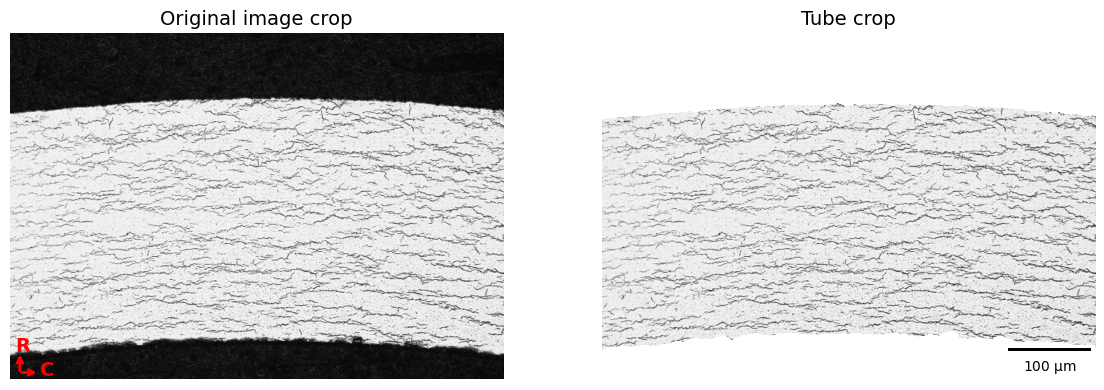

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]))

In [20]:
produce_cropped_image('data/520-5b.png',verbose=True)

In [6]:
produce_cropped_image('data/Micrographs_Used_To_Test_Code/1810A(16).bmp')

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]))

In [7]:
def produce_filtered_image(image):
    removed_grains = image_processing.minimize_grain_contrast(image, sigma = 10)
    fig, ax = threshold.try_all_threshold(removed_grains, figsize=(5, 9), verbose=True)
    plt.show()
    

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


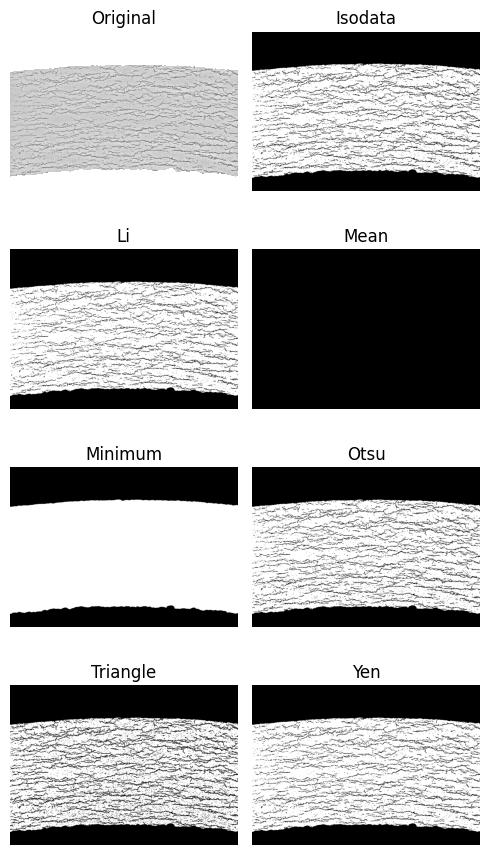

In [8]:
img,_ = produce_cropped_image('data/520-5b.png')
produce_filtered_image(img)

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


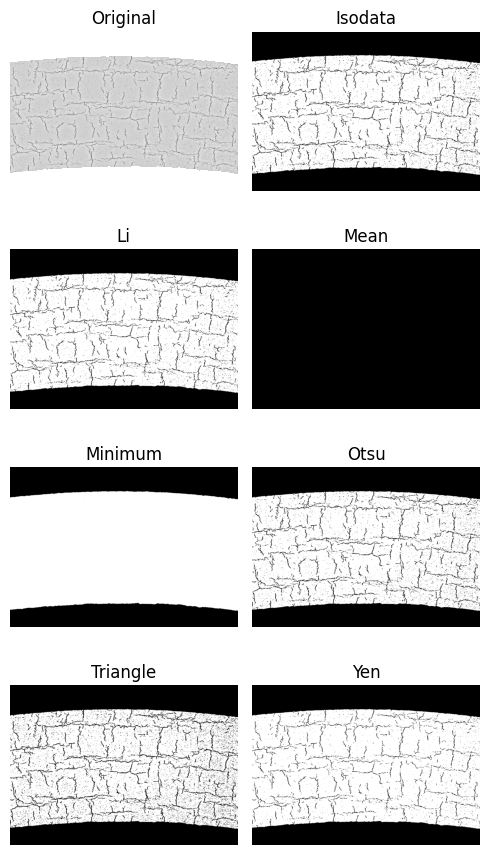

In [9]:
img,_ = produce_cropped_image('data/520-6h.png')
produce_filtered_image(img)

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


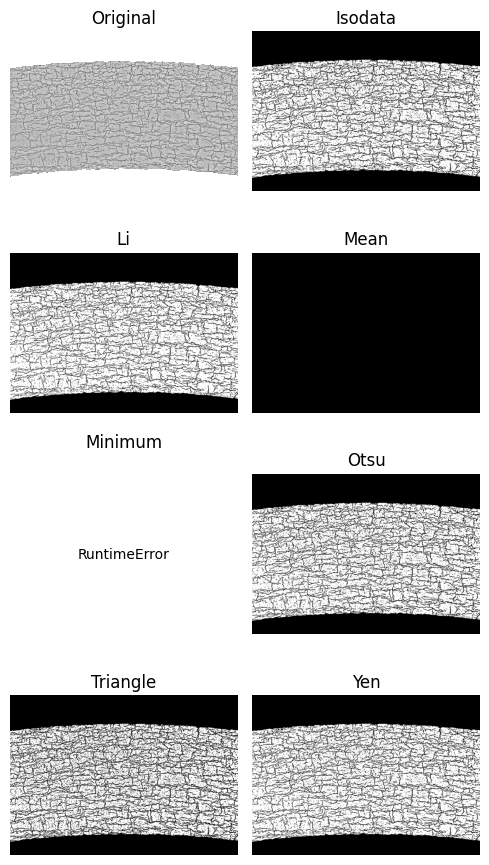

In [10]:
img,_ = produce_cropped_image('data/520-6m.png')
produce_filtered_image(img)

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


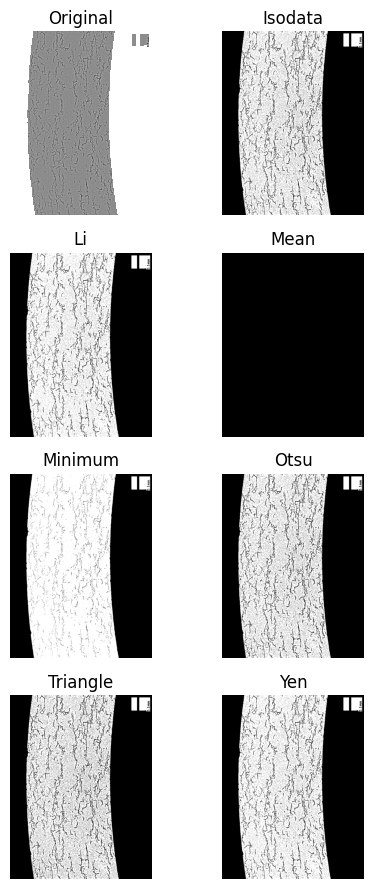

In [12]:
'data/Micrographs_Used_To_Test_Code/1810A(16).bmp'
img,_ = produce_cropped_image('data/Micrographs_Used_To_Test_Code/1807A(428).bmp')
produce_filtered_image(img)

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


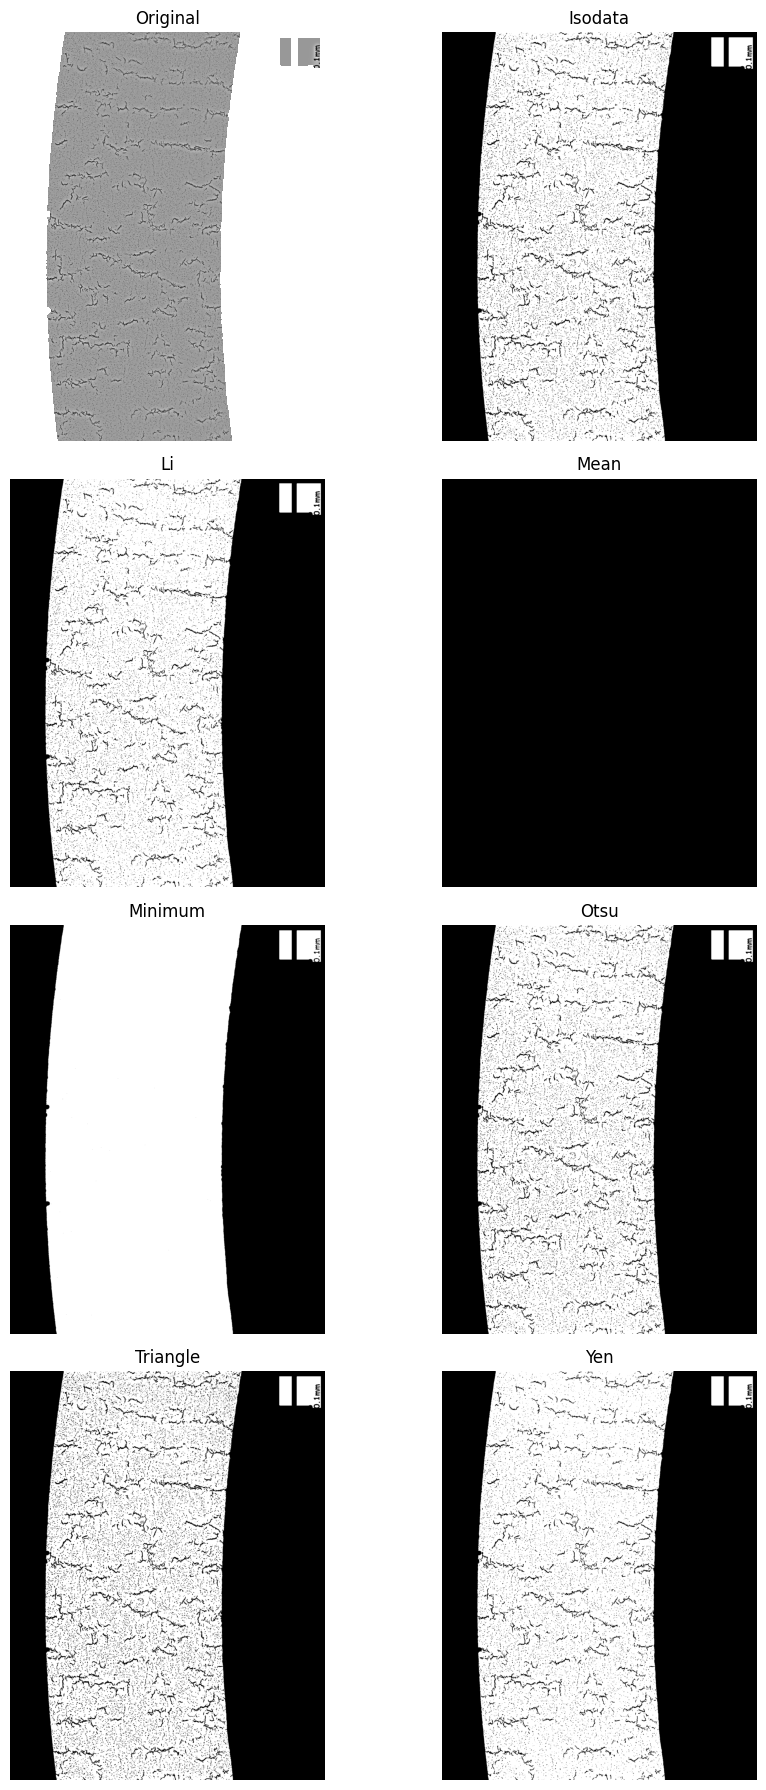

In [13]:
img,_ = produce_cropped_image('data/Micrographs_Used_To_Test_Code/1805A.bmp')
produce_filtered_image(img)

In [15]:
scale_um = 0.6042296072507553
iso_threshold = threshold.threshold_isodata(img)
thres_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = iso_threshold, small_obj = 40)
plt_f.plot_comparison(img,'og image',thres_image,'thresholded')

NameError: name 'crop_threshold' is not defined

In [ ]:
import skimage

In [ ]:
skimage.measure.

In [18]:
def plot_thres(img_fpath,scale=None, location=None, ax=None):
    """Plotting an imge.
    
    Parameters
    ----------
    img : array
        Image data to be plotted
    title : str
        Title of plot.
    scale : float
        Scale in meters per pixel.
    location : str
        Location of scale bar i.e. 'lower right', 'upper left'
    """
    img,crop_threshold = produce_cropped_image(img_fpath)
    
    li_thres = threshold.threshold_li(img)
    otsu_thres = threshold.threshold_otsu(img)
    tri_thres = threshold.threshold_triangle(img)
    yen_thres = threshold.threshold_yen(img)
    iso_thres = threshold.threshold_isodata(img)
    

    
    print(f'Li:{li_thres}')
    print(f'Otsu:{otsu_thres}')
    print(f'Triangle:{tri_thres}')
    print(f'Yen:{yen_thres}')
    print(f'Isodata:{iso_thres}')

    li_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = li_thres, small_obj = 40)
    otsu_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = otsu_thres, small_obj = 40)
    tri_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = tri_thres, small_obj = 40)
    yen_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = yen_thres, small_obj = 40)
    iso_image = image_processing.simple_threshold(img,scale_um, crop_threshold, 
                                          threshold = iso_thres, small_obj = 40)
    
    images = [img, li_image, tri_image, yen_image, iso_image, otsu_image]
    titles = ["Original", "Li", "Triangle", "Yen", "Isodata", "Otsu"]
    
    # Set up a 2x3 grid for the images
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))  # Adjust figsize as needed
    
    # Flatten the 2x3 array of axes to make iteration easier
    axs = axs.flatten()
    
    # Loop over each image and corresponding title
    for i, (img, title) in enumerate(zip(images, titles)):
        axs[i].imshow(img, cmap='gray')  # Use cmap='gray' for grayscale, remove it for color
        axs[i].set_title(title)
        axs[i].axis('off')  # Hide the axes
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [19]:
plot_thres('data/Micrographs_Used_To_Test_Code/1810A(16).bmp')

Li:0.4837217854344795
Otsu:0.572265625
Triangle:0.986328125
Yen:0.525390625
Isodata:0.568359375


NameError: name 'scale_um' is not defined

HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


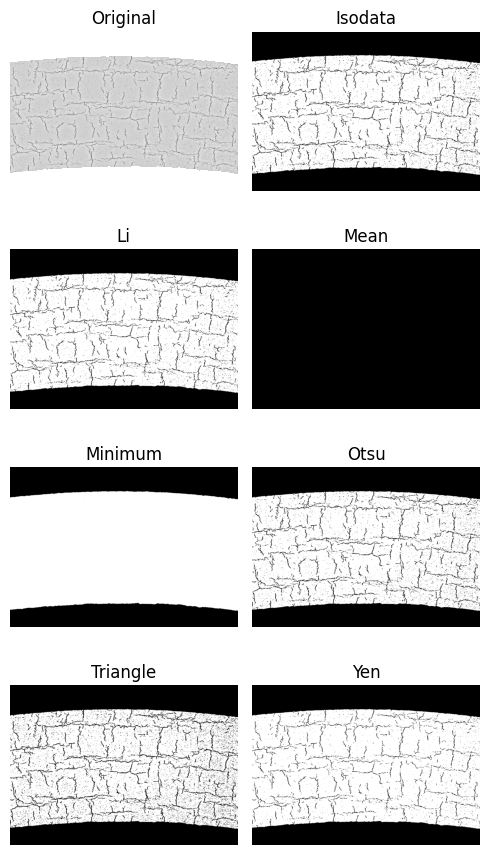

In [17]:
img,_ = produce_cropped_image('data/520-6h.png')
produce_filtered_image(img)